# Exercitiu 2

# sa se vizualizeze una din imagini

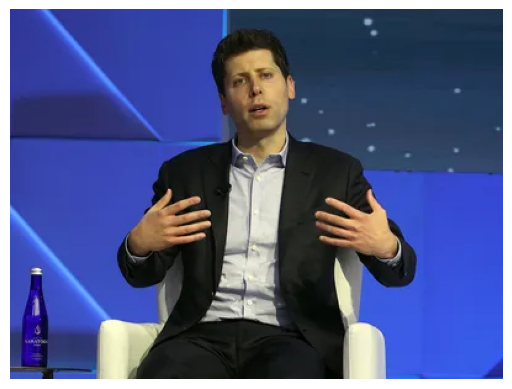

In [2]:
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


image_url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/refs/heads/main/2024-2025/labs/lab02/data/images/Altman.webp'
image = Image.open(urllib.request.urlopen(image_url))

#Conversie imaginii intr-un array pentru a fi folosit de matplotlib
image_array = np.array(image)

plt.imshow(image_array)
plt.axis('off')
plt.show()

# daca imaginile nu aceeasi dimensiune, sa se redimensioneze toate la 128 x 128 pixeli si sa se vizualizeze imaginile intr-un cadru tabelar.

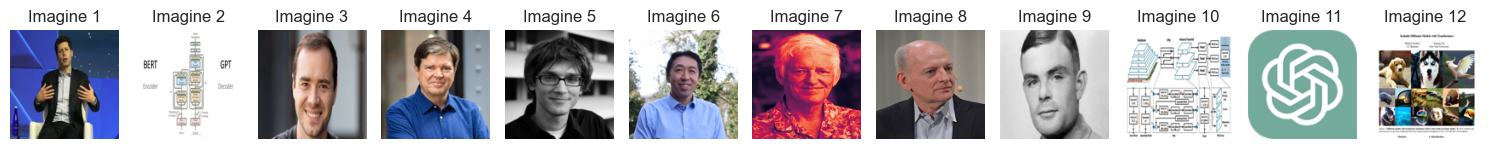

In [3]:
base_url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/refs/heads/main/2024-2025/labs/lab02/data/images/'

image_files = ['Altman.webp', 'BERT.png', 'Karpaty.jpg', 'LeCun.jpg', 'Leskovec.jpg', 'Ng.webp', 'Norvig.jpg', 'Russell.jpg',
               'Turing.webp', 'YOLO.jpg', 'chatGPT.png', 'diffusionModel.jpg']

# Crearea unei figuri cu un cadru tabelar pentru imagini
defin, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

# Dacă exista mai multe imagini, setam subplots pentru fiecare
for i, image_file in enumerate(image_files):

    image_url = base_url + image_file
    image = Image.open(urllib.request.urlopen(image_url))
    image = image.resize((128, 128))

    # Conversia imaginii intr-un array pentru a fi folosit cu matplotlib
    img_array = np.array(image)

    # Afisarea imaginii in fiecare subplot
    axes[i].imshow(img_array)
    axes[i].axis('off')
    axes[i].set_title(f"Imagine {i+1}")


plt.tight_layout()
plt.show()

# sa se transforme imaginile in format gray-levels si sa se vizualizeze

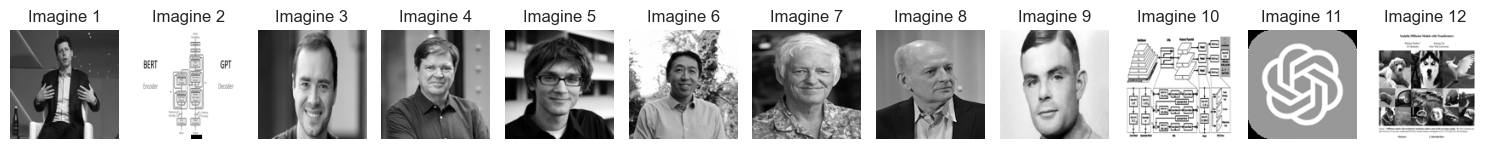

In [4]:
defin, axes = plt.subplots(1, len(image_files), figsize=(15, 5))

for i, image_file in enumerate(image_files):

    image_url = base_url + image_file
    image = Image.open(urllib.request.urlopen(image_url))
    image = image.resize((128, 128))

    # Transformarea imaginii in format gray-level
    image_gray = image.convert('L')  # 'L' pentru tonuri de gri

    image_array = np.array(image_gray)

    axes[i].imshow(image_array, cmap='gray')  # Specifica cmap pentru a afișa imaginea in tonuri de gri
    axes[i].axis('off')
    axes[i].set_title(f"Imagine {i+1}")


plt.tight_layout()
plt.show()

# sa se blureze o imagine si sa se afiseze in format "before-after"

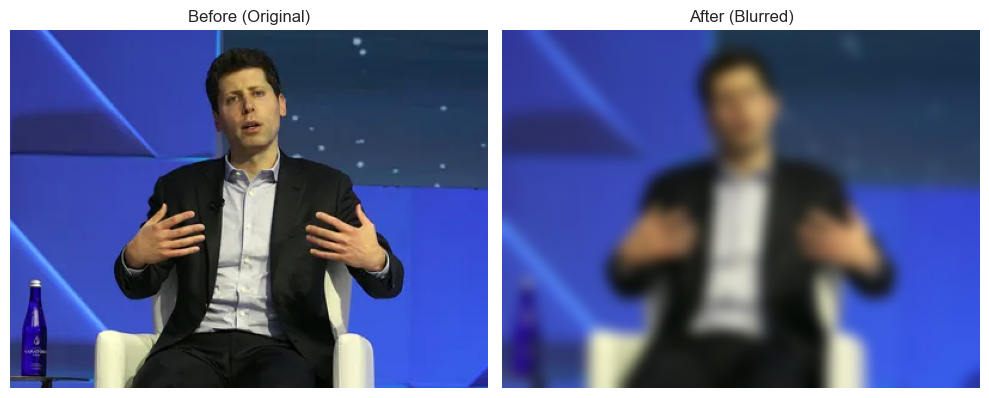

In [5]:
from PIL import Image, ImageFilter

imagine_nume = 'Altman.webp'
url_imagine = base_url + imagine_nume
imagine = Image.open(urllib.request.urlopen(url_imagine))

imagine_blurred = imagine.filter(ImageFilter.GaussianBlur(radius=5))

defin, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(np.array(imagine))
axes[0].axis('off')
axes[0].set_title("Before (Original)")

axes[1].imshow(np.array(imagine_blurred))
axes[1].axis('off')
axes[1].set_title("After (Blurred)")

plt.tight_layout()
plt.show()

# sa se identifice muchiile intr-o imagine si sa se afiseze in format "before-after"

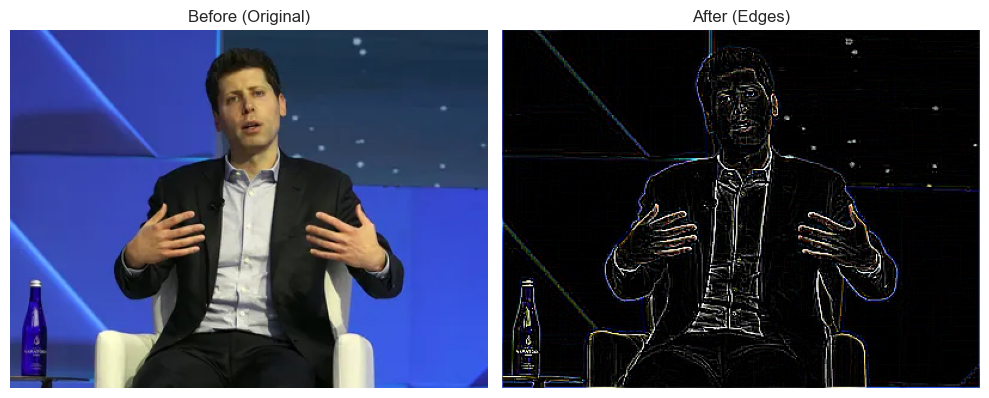

In [6]:

imagine_nume = 'Altman.webp'
url_imagine = base_url + imagine_nume
imagine = Image.open(urllib.request.urlopen(url_imagine))


# Aplicarea filtrului FIND_EDGES pentru detecția muchiilor
edges_imagine = imagine.filter(ImageFilter.FIND_EDGES)

var, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(imagine, cmap='gray')
axes[0].axis('off')
axes[0].set_title("Before (Original)")

axes[1].imshow(edges_imagine, cmap='gray')
axes[1].axis('off')
axes[1].set_title("After (Edges)")

# Afișarea imaginilor
plt.tight_layout()
plt.show()

# NORMALIZARE

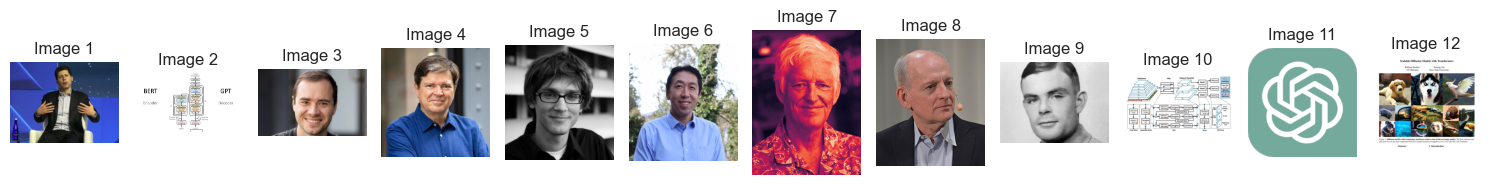

In [8]:
base_url = 'https://raw.githubusercontent.com/lauradiosan/AI-UBB/refs/heads/main/2024-2025/labs/lab02/data/images/'

files = ['Altman.webp', 'BERT.png', 'Karpaty.jpg', 'LeCun.jpg', 'Leskovec.jpg', 'Ng.webp', 'Norvig.jpg', 'Russell.jpg',
               'Turing.webp', 'YOLO.jpg', 'chatGPT.png', 'diffusionModel.jpg']

all_images = []

for image_file in files:
    image_url = base_url + image_file
    image = Image.open(urllib.request.urlopen(image_url))
    img_array = np.array(image)

    all_images.append(img_array)

all_images_array = np.concatenate([img.flatten() for img in all_images])

min_val = np.min(all_images_array)
max_val = np.max(all_images_array)

defin, axes = plt.subplots(1, len(files), figsize=(15, 5))

for i, image_file in enumerate(files):

    img_array = all_images[i]
    img_normalized = (img_array - min_val) / (max_val - min_val)

    axes[i].imshow(img_normalized)
    axes[i].axis('off')
    axes[i].set_title(f"Image {i+1}")

plt.tight_layout()
plt.show()
